# Ejercicio 1 - Usando deep learning para modelos lineales

Función a modelar

<!-- $Y = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_i -y_i)^2$ -->
$Y = f(x)=x^3+3x^2+9$

In [2]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

2025-01-26 03:21:40.147029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737861700.161188     329 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737861700.165193     329 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 03:21:40.180024: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


I0000 00:00:1737861702.757099     329 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9381 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
print("Tensor flow versión: ", tf.__version__)
print("GPUs: ",tf.config.list_physical_devices('GPU')) 

Tensor flow versión:  2.18.0
GPUs:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

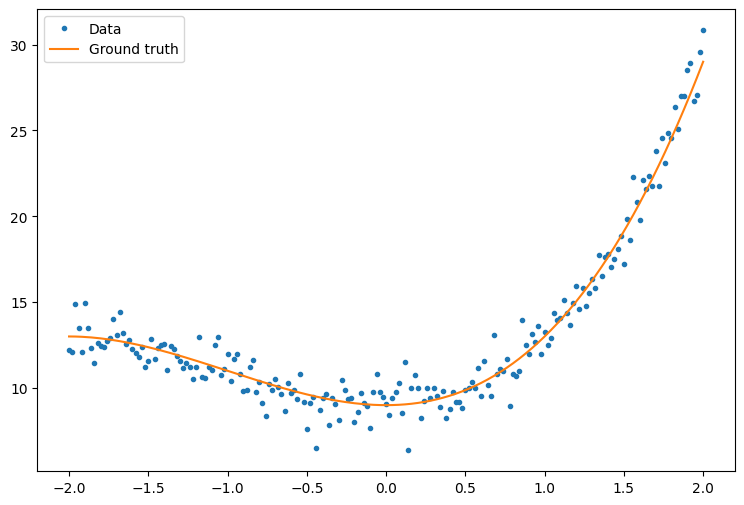

In [4]:
x = tf.linspace(-2, 2, 201) #x es un vector de 200 puntos que van de -2 a 2
x = tf.cast(x, tf.float32)

def f(x):
  y = x**3 + 3*x**2 + 9
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [5]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    

    # Initialize model parameters
    self.w_t = tf.Variable(rand_init[0])
    self.w_q = tf.Variable(rand_init[1])
    # self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])
  
  
  @tf.function
  def __call__(self, x):
    return self.w_t * (x**3) + self.w_q * x**2 + self.b

In [6]:
quad_model = Model()

In [7]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

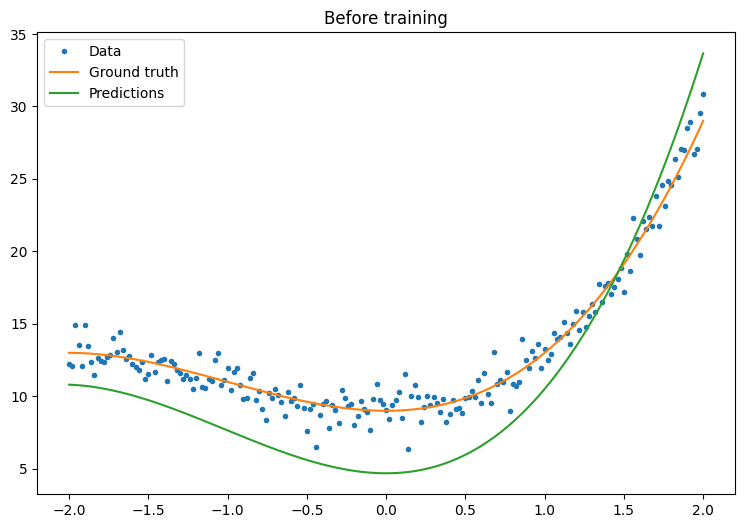

In [8]:
plot_preds(x, y, f, quad_model, 'Before training')

In [9]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [10]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

2025-01-26 03:30:52.037945: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-26 03:30:52.066351: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-26 03:30:52.114199: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-26 03:30:52.210781: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 0: 7.735
Mean squared error for step 10: 3.091


2025-01-26 03:30:52.407855: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 20: 1.644
Mean squared error for step 30: 1.124


2025-01-26 03:30:52.799382: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 40: 0.942
Mean squared error for step 50: 0.875
Mean squared error for step 60: 0.859


2025-01-26 03:30:53.554264: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 70: 0.852
Mean squared error for step 80: 0.854
Mean squared error for step 90: 0.846




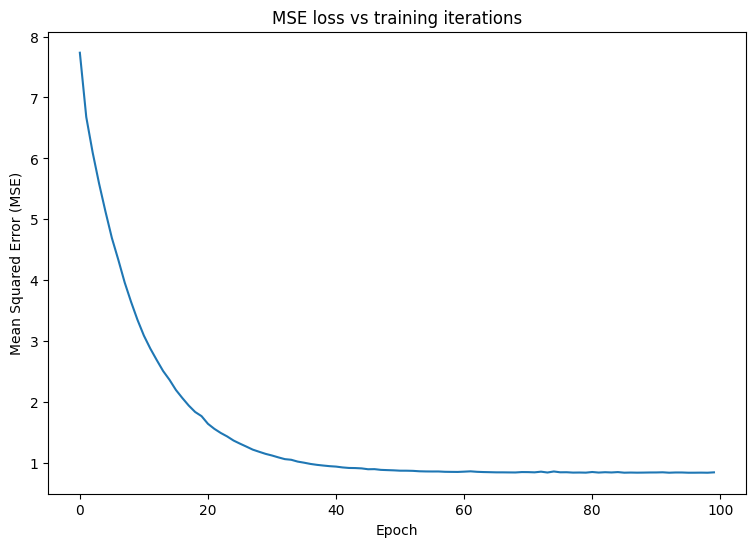

In [11]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

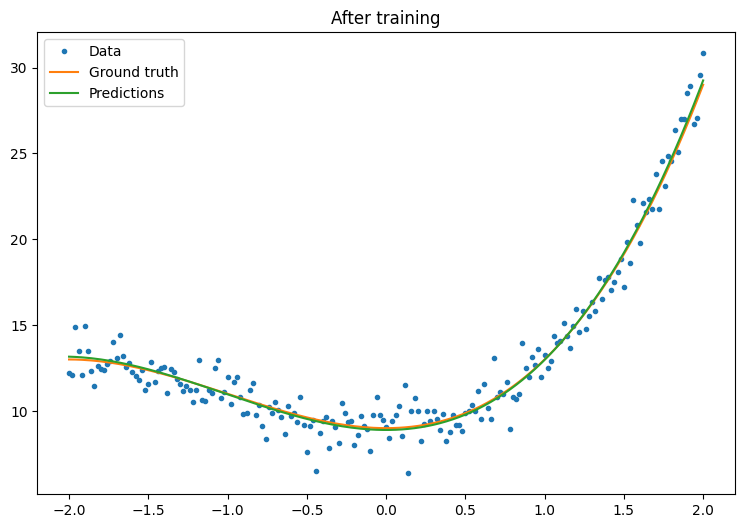

In [12]:
plot_preds(x, y, f, quad_model, 'After training')